<a href="https://colab.research.google.com/github/Orkthi/metodos-numericos-para-equacoes-diferenciais/blob/main/difus%C3%A3o_totalmente_implicita.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

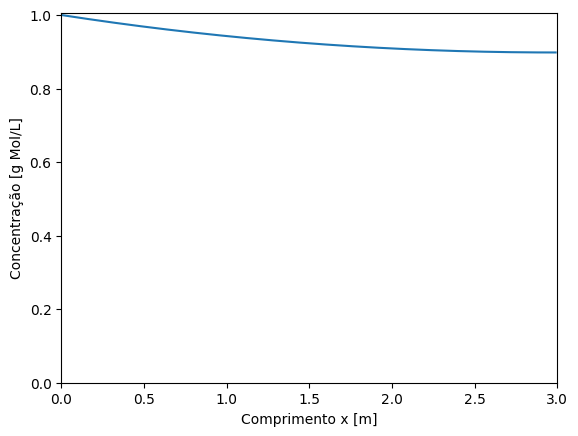

In [3]:
# Importando bibliotecas
import matplotlib.pyplot as plt
import numpy as np

# Número de nós
N = 300

# Condições de contorno
Ce = 1

# Constantes do sistema
D = 40
k1 = 1
k2 = 1
L = 1
Lf = 2
Lt = L + Lf
dx = Lt/N

s = D/(dx**2)

# Criando a matriz do sistema
M = np.zeros(shape=(N-2, N-2))

# Criando o vetor de variáveis do sistema
C = np.zeros(shape=(N,))

# Criando o vetor dos resultados do sistema
R = np.zeros(shape=(N-2,))

# Criando a matriz de posições
X = np.zeros(shape=(N))

# Criando o vetor de coeficientes k (k varia no espaço)
K = np.zeros(shape=(N-2))

# Preenchendo os valores de k
Nk1 = int(L/Lt * (N))
for i in range(Nk1):
    K[i] = k1

for i in range(Nk1, N-2):
    K[i] = k2

# Preenchendo a matriz do sistema
# Diagonal principal do sistema
for i in range(N - 3):
    #M[i][i] = -(2*D/(dx**2) + K[i])
    M[i][i] = -(2*s + K[i])

M[N-3][N-3] = -(s + K[N-3])

# Diagonais paralelas à diag. principal do sistema
for i in range(N-3):
    M[i+1][i] = s #D/(dx**2)
    M[i][i+1] = s #D/(dx**2)

# Preenchendo os resultados do sistema
R[0] = -s*Ce

# Guardando os valores das condições de contorno nas matrizes
C[0] = Ce

# Preenchendo os valores das posições
for i in range(N):
    X[i] = i*dx

# OBS.: Apagar... essa função só printa a matriz ou vetor
def PrintMat(M):
    for i in M:
        try:
            for j in i:
                print(f"{j} ", end="")
            print()
        except:
            print(f"{i} ")

    return

def gauss_jacobi(A, b, epsilon=0.001, max_iter=10000):
    # Inicializando as variáveis
    n = len(A)
    x_old = np.zeros(n)  # Vetor inicial de chutes (inicializado com zeros)
    x_new = np.zeros(n)  # Vetor para armazenar as atualizações

    # Critério de parada: máximo de iterações ou erro menor que epsilon
    for iteration in range(max_iter):
        #print(f"Iteração {iteration+1}:")
        for i in range(n):
            # Calcula a nova estimativa para a variável
            sum_terms = sum(A[i][j] * x_old[j] for j in range(n) if j != i)
            x_new[i] = (b[i] - sum_terms) / A[i][i]

        # Printa os valores das variáveis a cada iteração
        for k in range(n):
            print(f"x{k+1} = {x_new[k]}")

        # Verifica o critério de parada (erro)
        if np.linalg.norm(x_new - x_old) < epsilon:
            print("\nConvergência alcançada!")
            return x_new

        # Atualiza o vetor para a próxima iteração
        x_old = np.copy(x_new)
        #print("-------------------------------")

    print("Número máximo de iterações alcançado.")
    return x_new

def main():

    # Resolve o sistema com gauss_jacobi
    C[1:-1] = np.linalg.solve(M, R) #gauss_jacobi(M,R)

    # condição de contorno dC/dx = 0 no último ponto
    C[-1] = C[-2]

    # Plotando o gráfico e deixando bonitinho :)
    plt.plot(X, C)
    plt.xlabel("Comprimento x [m]")
    plt.ylabel("Concentração [g Mol/L]")
    plt.xlim(0, Lt)
    plt.ylim(0, None)
    plt.show()

main()

In [ ]:
asd = float(input("Digite um valor: "))

Digite um valor: 12.3
